In [1]:
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, ZeroPadding2D
from keras.optimizers import SGD
from keras import backend as K
from keras.layers.advanced_activations import ELU
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, History
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split

K.set_image_dim_ordering('th')
K.set_image_data_format('channels_last')
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
#1
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/data/private/SU/jh/chest_xray/train', 
        target_size=(512, 512),
        color_mode='grayscale',
        batch_size=10,                   
        class_mode='binary')


#2
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        '/data/private/SU/jh/chest_xray/val',
        target_size=(512, 512),
        color_mode='grayscale',
        batch_size=1,
        class_mode='binary')


#3
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        '/data/private/SU/jh/chest_xray/test',
        target_size=(512, 512),
        color_mode='grayscale',
        batch_size=1,
        class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [3]:
from keras import layers
from keras import models
from keras import optimizers

model = Sequential() 
model.add(ZeroPadding2D((1,1),input_shape=(512,512,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))


model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))


model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2))) 


model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu')) 
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))


model.add(Flatten()) #top layer of the VGG net 
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer=optimizers.adam(lr=0.0001),metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 514, 514, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 64)      640       
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 514, 514, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 512, 512, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 64)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 258, 258, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 128)     73856     
__________

In [4]:
history = model.fit_generator(
          train_generator,
          steps_per_epoch=520,
          epochs=15,
          validation_data=val_generator,
          validation_steps=16)

Epoch 1/15
520/520 [==============================] - 354s 681ms/step - loss: 0.2679 - acc: 0.8889 - val_loss: 0.4226 - val_acc: 0.8125
Epoch 2/15
520/520 [==============================] - 342s 657ms/step - loss: 0.1032 - acc: 0.9637 - val_loss: 0.1031 - val_acc: 0.9375
Epoch 3/15
520/520 [==============================] - 341s 656ms/step - loss: 0.0641 - acc: 0.9742 - val_loss: 0.4699 - val_acc: 0.8750
Epoch 4/15
520/520 [==============================] - 342s 657ms/step - loss: 0.0447 - acc: 0.9852 - val_loss: 0.0302 - val_acc: 1.0000
Epoch 5/15
520/520 [==============================] - 341s 656ms/step - loss: 0.0342 - acc: 0.9862 - val_loss: 0.1744 - val_acc: 0.8750
Epoch 6/15
520/520 [==============================] - 341s 657ms/step - loss: 0.0218 - acc: 0.9910 - val_loss: 0.4983 - val_acc: 0.8750
Epoch 7/15
520/520 [==============================] - 341s 657ms/step - loss: 0.0205 - acc: 0.9935 - val_loss: 0.1282 - val_acc: 0.9375
Epoch 8/15
520/520 [============================

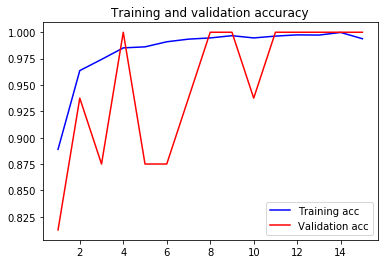

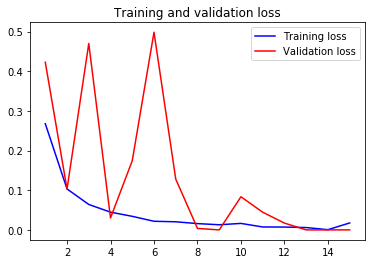

In [6]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [7]:
print("-- Evaluate --")

scores = model.evaluate_generator(
            test_generator, 
            steps = 100)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 모델 예측하기
print("-- Predict --")

output = model.predict_generator(
            test_generator, 
            steps = 100)

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(output)

-- Evaluate --
acc: 68.00%
-- Predict --
[[1.000]
 [0.999]
 [1.000]
 [1.000]
 [0.996]
 [1.000]
 [1.000]
 [1.000]
 [0.999]
 [0.969]
 [1.000]
 [1.000]
 [0.975]
 [0.755]
 [1.000]
 [1.000]
 [0.035]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [0.922]
 [0.999]
 [0.996]
 [1.000]
 [1.000]
 [0.999]
 [1.000]
 [1.000]
 [1.000]
 [0.551]
 [0.000]
 [1.000]
 [0.938]
 [0.995]
 [1.000]
 [0.833]
 [0.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [0.000]
 [1.000]
 [0.588]
 [1.000]
 [0.993]
 [0.981]
 [1.000]
 [0.931]
 [0.968]
 [0.000]
 [1.000]
 [1.000]
 [1.000]
 [0.028]
 [0.000]
 [0.988]
 [0.003]
 [0.000]
 [0.791]
 [1.000]
 [0.035]
 [1.000]
 [1.000]
 [0.002]
 [1.000]
 [0.000]
 [1.000]
 [1.000]
 [1.000]
 [0.008]
 [1.000]
 [1.000]
 [1.000]
 [0.000]
 [0.000]
 [1.000]
 [1.000]
 [1.000]
 [0.999]
 [1.000]
 [0.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [0.004]
 [1.000]
 [0.019]
 [0.999]
 [0.996]
 [1.000]]
